# Downloading data

In [26]:
!pip install gdown --upgrade
!gdown 1qHQ9BUmhJoDLZ40PaVJENmNJyT1_8M8C
!unzip release-youtube-links.zip
!rm release-youtube-links.zip

Downloading...
From: https://drive.google.com/uc?id=1qHQ9BUmhJoDLZ40PaVJENmNJyT1_8M8C
To: /content/release-youtube-links.zip
100% 21.5M/21.5M [00:00<00:00, 104MB/s] 
Archive:  release-youtube-links.zip
replace release-youtube-groupmemberships.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


# Imports

In [27]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Creating graph

In [28]:
G = nx.Graph()
lines = []
lines_minus_one = []
with open('release-youtube-users.txt') as f:
    lines = f.readlines()
for line in lines:
    G.add_node(int(line)-1) 
    lines_minus_one.append(f"{int(line)-1}\n")
with open('release-youtube-users-m1.txt', 'w') as f:
    f.writelines(lines_minus_one)
lines_minus_one = []
with open('release-youtube-links.txt') as f:
    lines = f.readlines()
for line in lines:
    link = line.split()
    G.add_edge(int(link[0])-1, int(link[1])-1)
    lines_minus_one.append(f"{int(link[0])-1}\t{int(link[1])-1}\n")
with open('release-youtube-links-m1.txt', 'w') as f:
    f.writelines(lines_minus_one)

# Exploring the graph

In [14]:
print(f"There are {len(G.nodes())} users")
print(f"There are {len(G.edges())} relations")
print(f"There is {nx.number_connected_components(G)} connected components")
largest_cc = max(nx.connected_components(G), key=len)
G = G.subgraph(largest_cc).copy()
print(f"There are {len(G.nodes())} users in the greatest connected component")
print(f"There are {len(G.edges())} relations in the greatest connected component")
print(f"There is {nx.number_connected_components(G)} connected components")

There are 1157827 users
There are 2990443 relations
There is 20258 connected components
There are 1134890 users in the greatest connected component
There are 2987624 relations in the greatest connected component
There is 1 connected components


In [16]:
print(f"Average clustering coefficient: {nx.average_clustering(G)}")
print(f"There are {sum(nx.triangles(G).values())} triangles")
print(f"Diameter: {nx.diameter(G)}")

There are 9169158 triangles


KeyboardInterrupt: ignored

KeyboardInterrupt: ignored

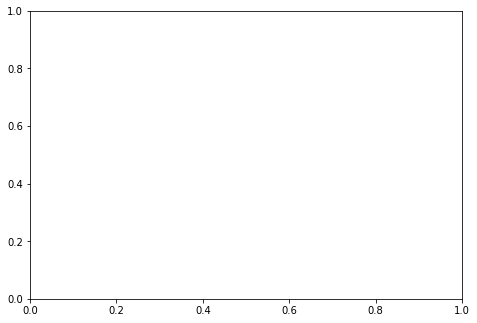

In [17]:
nx.draw(G)

# Community GAN

In [4]:
!git clone https://github.com/SamJia/CommunityGAN.git

Cloning into 'CommunityGAN'...
remote: Enumerating objects: 57, done.
remote: Total 57 (delta 0), reused 0 (delta 0), pack-reused 57
Unpacking objects: 100% (57/57), done.


In [30]:
%cd CommunityGAN/src/CommunityGAN
!cp ../../../release-youtube-links-m1.txt ../../data/community_detection/release-youtube-links_train.txt

[Errno 2] No such file or directory: 'CommunityGAN/src/CommunityGAN'
/content/CommunityGAN/src/CommunityGAN


In [31]:
!python community_gan.py dataset com-amazon n_emb 100

modes:	['gen', 'dis']
motif_size:	3
batch_size_gen:	64
batch_size_dis:	64
n_sample_gen:	5
n_sample_dis:	5
lr_gen:	0.001
lr_dis:	0.001
n_epochs:	10
n_epochs_gen:	3
n_epochs_dis:	3
gen_interval:	3
dis_interval:	3
update_ratio:	1
max_value:	1000
load_model:	False
save_steps:	10
n_emb:	100
num_threads:	16
window_size:	5
app:	community_detection
dataset:	com-amazon
train_filename:	../../data/community_detection/com-amazon_train.txt
pretrain_emb_filename_d:	../../pre_train/community_detection/com-amazon_pre_train.emb
pretrain_emb_filename_g:	../../pre_train/community_detection/com-amazon_pre_train.emb
community_filename:	../../data/community_detection/com-amazon.sampled.cmty.txt
model_log:	../../log/
cache_filename_prefix:	../../cache/community_detection/com-amazon
emb_filenames:	['../../results/community_detection/com-amazon_gen_.emb', '../../results/community_detection/com-amazon_dis_.emb']
result_filename:	../../results/community_detection/com-amazon.txt
reading graphs...
getting motifs w

In [32]:
%cd ../../..

/content


# Ego-splitting

In [33]:
!pip install karateclub

In [34]:
from karateclub import EgoNetSplitter

splitter = EgoNetSplitter(1.0)
splitter.fit(G)
print(splitter.get_memberships())

AttributeError: ignored